# Analyzing EDI files set using GeoPandas 

## Fei Zhang
### 2017-09


In [1]:
import os, sys,glob

import folium
from IPython.display import display

from shapely.geometry import mapping

%matplotlib inline

import pandas as pd
import geopandas as gpd

from shapely.geometry import Point

In [2]:
def csv_latlon2points(csvfile):
    
    pdf = pd.read_csv(csvfile)
    mt_locations = [Point(xy) for xy in zip(pdf.LON, pdf.LAT)]
    #OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
    #if you want to df = df.drop(['Lon', 'Lat'], axis=1)
    crs = {'init': 'epsg:4326'}  # WGS84
    crs = {'init': 'epsg:4283'}  # GDA94
    geo_df = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)

    return geo_df

In [3]:
# path2csv='E:/Data/MT_Datasets/WenPingJiang_SHP/PhaseTensorTipper_Params_1.0986Hz.csv'
path2csv='E:/example_data_edi_files/edi_measurement.csv'
path2dir=os.path.dirname(path2csv)
mygdf=csv_latlon2points(path2csv)

In [4]:
# mygdf.head()
mygdf.shape

(645, 25)

In [5]:
mygdf.crs

{'init': 'epsg:4283'}

In [6]:
shape_fname=path2csv.upper().replace('.CSV', '.SHP')   # 'geopandas_made.shp'
outshp=os.path.join(path2dir,shape_fname)


In [7]:
outshp

'E:/EXAMPLE_DATA_EDI_FILES/EDI_MEASUREMENT.SHP'

In [8]:
mygdf.to_file(outshp, driver='ESRI Shapefile')

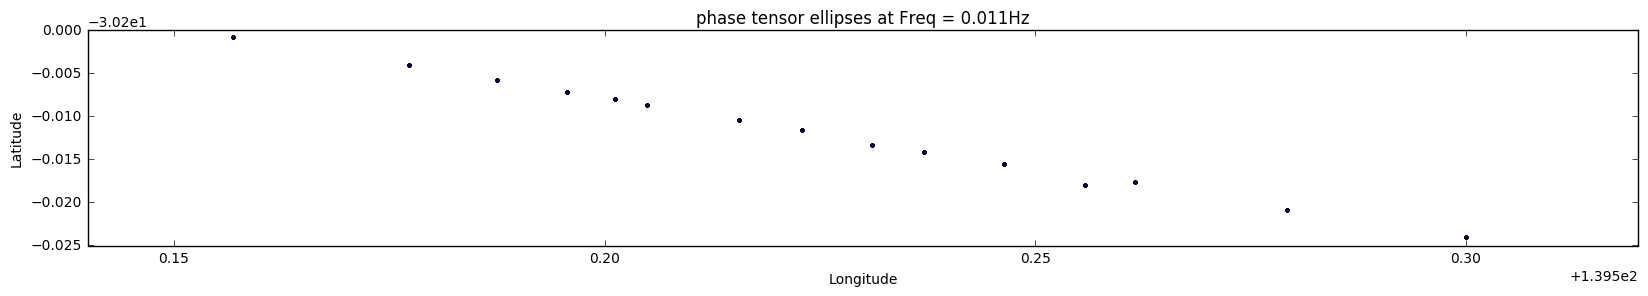

In [9]:
title_str='phase tensor ellipses at Freq = 0.011Hz'
myax = mygdf.plot(figsize=[20,10], linewidth=2.0, color='b', cmap='jet')



myax.set_xlabel('Longitude')
myax.set_ylabel('Latitude')
myax.set_title(title_str)

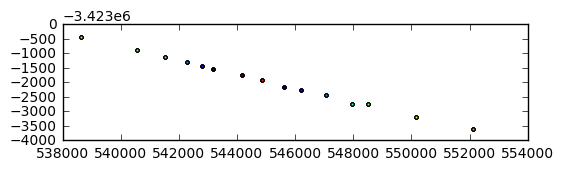

In [10]:
mygdf.to_crs({'init':'epsg:3112'}).plot()  # 3112 is GDA94/GALambertConformal

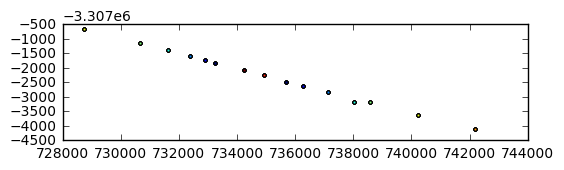

In [11]:
mygdf.to_crs({'init':'epsg:3577'}).plot()  #EPSG Projection 3577 - GDA94 / Australian Albers 

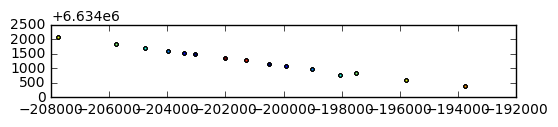

In [12]:
mygdf.to_crs({'init':'epsg:28355'}).plot() #28355 http://spatialreference.org/ref/epsg/gda94-mga-zone-55/

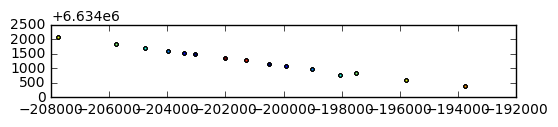

In [13]:
mygdf.to_crs({'init':'epsg:32755'}).plot() #32755 is WGS84/UTMS55

In [14]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'

#mpl.rcParams['figure.figsize']=(8,30)

In [15]:
#gdf_utm54=mygdf.to_crs({'init':'epsg:32754'})  #.plot()

#outshp=os.path.join(path2dir,'geopandas_made_utm54.shp')

#gdf_utm54.to_file(outshp, driver='ESRI Shapefile')


In [16]:

geojson = mygdf.to_json()
bounds = mygdf.total_bounds


In [17]:
print bounds

(139.6568, -30.223959000000004, 139.80001000000001, -30.200796)


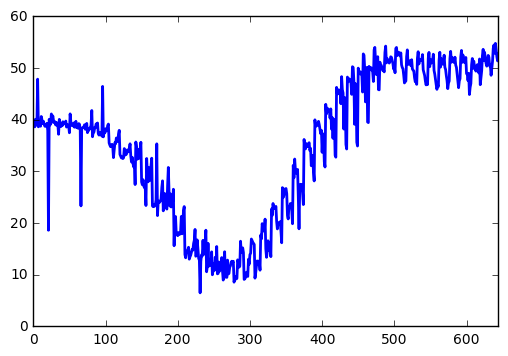

In [18]:
mygdf['PHSxy'].plot()

In [19]:
mygdf.columns

Index([u'FREQ', u'STATION', u'LAT', u'LON', u'ZXXre', u'ZXXim', u'ZXYre',
       u'ZXYim', u'ZYXre', u'ZYXim', u'ZYYre', u'ZYYim', u'TXre', u'TXim',
       u'TYre', u'TYim', u'RHOxx', u'RHOxy', u'RHOyx', u'RHOyy', u'PHSxx',
       u'PHSxy', u'PHSyx', u'PHSyy', u'geometry'],
      dtype='object')

In [20]:
mygdf['ZXYre'].describe()

count    645.000000
mean       6.135818
std        6.224597
min        0.672551
25%        2.439654
50%        3.581531
75%        7.120783
max       30.526270
Name: ZXYre, dtype: float64

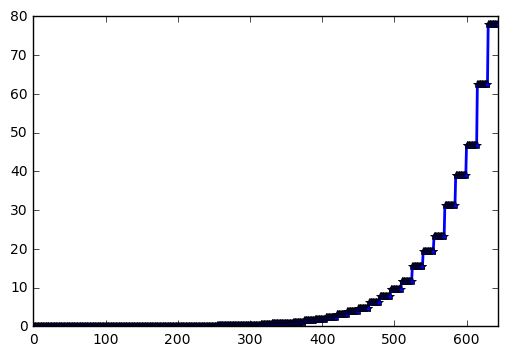

In [21]:
#mygdf['frequency'].plot(marker='*')   # tolerance ftol=10%

mygdf['FREQ'].plot(marker='*')   # tolerance ftol=10%

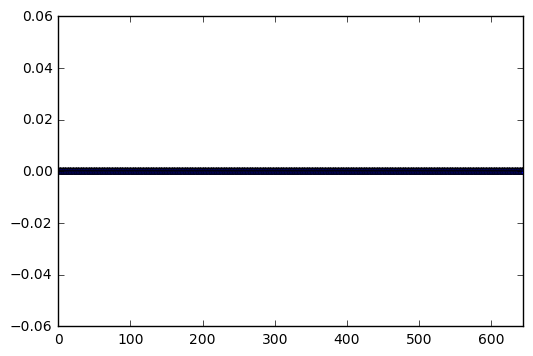

In [22]:
mygdf['TXre'].plot(marker='*')  

#mygdf['tip_ang_re'].plot(marker='*')  

In [23]:
# output jeojson?

# geojson

## https://geohackweek.github.io/vector/04-geopandas-intro/

OR

## http://nbviewer.jupyter.org/github/geohackweek/vector/blob/gh-pages/docker/notebooks/geopandas_intro.ipynb
Like shapely, these spatial data types are limited to discrete entities/features and do not address continuously varying rasters or fields.

While GeoPandas spatial objects can be assigned a Coordinate Reference System (CRS), operations can not be performed across CRS’s. Plus, geodetic (“unprojected”, lat-lon) CRS are not handled in a special way; the area of a geodetic polygon will be in degrees.


In [24]:
mygdf.iloc[-1]  # last row or feature

FREQ                             78.125
STATION                            pb44
LAT                            -30.2008
LON                             139.657
ZXXre                          0.552608
ZXXim                           1.29571
ZXYre                           30.5263
ZXYim                           40.1355
ZYXre                          -30.1887
ZYXim                          -41.8032
ZYYre                       -0.00806402
ZYYim                           0.20988
TXre                                  0
TXim                                  0
TYre                                  0
TYim                                  0
RHOxx                        0.00507967
RHOxy                           6.50934
RHOyx                           6.80669
RHOyy                       0.000112933
PHSxx                           66.9022
PHSxy                           52.7441
PHSyx                           54.1646
PHSyy                           92.2003
geometry    POINT (139.6568 -30.200796)


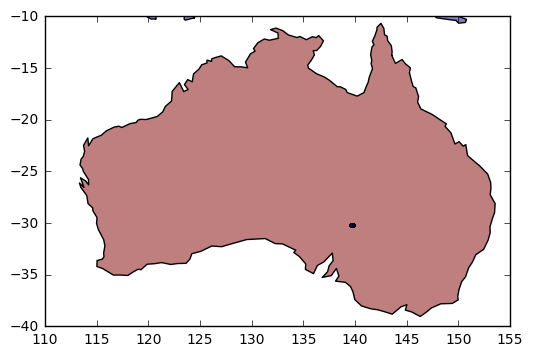

In [25]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
myax=world.plot(alpha=0.5)

myax.set_xlim([138,150])
myax.set_ylim([-30,-10])

myax.set_xlim([110,155])
myax.set_ylim([-40,-10])
              
mygdf.plot(ax=myax, figsize=(10, 20), marker='o', color='blue', markersize=2);

In [26]:
# subset of mygdf according to station or freq


In [30]:
#mygdf2 = mygdf.where (mygdf['FREQ'] == 0.000122)  # not working
mygdf2 = mygdf.loc[mygdf['STATION'] == 'pb40']

In [31]:
mygdf2.head()

,FREQ,STATION,LAT,LON,ZXXre,ZXXim,ZXYre,ZXYim,ZYXre,ZYXim,...,TYim,RHOxx,RHOxy,RHOyx,RHOyy,PHSxx,PHSxy,PHSyx,PHSyy,geometry
10,0.004578,pb40,-30.208029,139.70117,-0.094077,0.099926,0.906393,0.727456,-0.250600,-0.321708,...,0.0,0.822878,59.010073,7.265027,1.158666,133.273049,38.749968,52.082585,53.126424,POINT (139.70117 -30.208029)
25,0.006104,pb40,-30.208029,139.70117,-0.105620,0.127623,1.097100,0.958029,-0.313583,-0.401844,...,0.0,0.899185,69.510078,8.512871,1.044616,129.610790,41.128679,52.032955,50.573132,POINT (139.70117 -30.208029)
40,0.007629,pb40,-30.208029,139.70117,-0.027474,0.159822,1.265227,1.018945,-0.339110,-0.469413,...,0.0,0.689419,69.184645,8.791307,1.284346,99.753878,38.846078,54.155208,42.221176,POINT (139.70117 -30.208029)
55,0.009155,pb40,-30.208029,139.70117,0.002011,0.191500,1.369215,1.101018,-0.364221,-0.551852,...,0.0,0.801233,67.438347,9.550994,0.948708,89.398388,38.803580,56.575301,44.787486,POINT (139.70117 -30.208029)
70,0.012207,pb40,-30.208029,139.70117,0.026735,0.221188,1.452596,1.161816,-0.374278,-0.615179,...,0.0,0.813282,56.686353,8.495613,0.692538,83.108003,38.653535,58.683457,48.410109,POINT (139.70117 -30.208029)


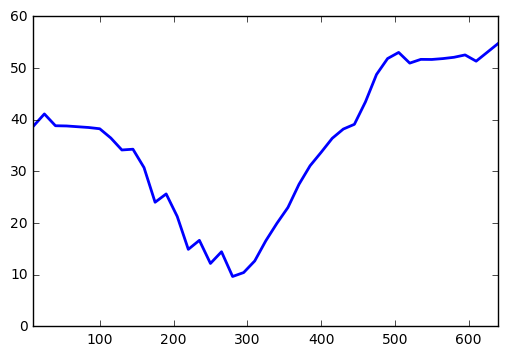

In [35]:
mygdf2['PHSxy'].plot()

In [ ]:
FIN

# Construct phase_tensor Ellipses and Tippers 

# write to shape files with different projections: wgs84, utm, etc.

In [ ]:
import numpy as np
    
from shapely.geometry import Point, Polygon, LineString, LinearRing

def create_tipper_real_shp(csvfile,  arr_size=4):
    """ create tipper lines shape file.  
    Must use a GIS software such as ArcGIS to display and add an arrow at each line's end
    arr_size=4  how long will be the line (arrow)
    """
    
    pdf = pd.read_csv(csvfile)
    mt_locations = [Point(xy) for xy in zip(pdf.lon, pdf.lat)]
    #OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
    #if you want to df = df.drop(['Lon', 'Lat'], axis=1)
    crs = {'init': 'epsg:4326'}  # WGS84
    
    #geo_df = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)
    
    pdf['tip_re'] = pdf.apply(lambda x: 
        LineString([(float(x.lon), float(x.lat)), 
                    (float(x.lon)+ arr_size*x.tip_mag_re*np.cos(-np.deg2rad(x.tip_ang_re)),
                     float(x.lat)+ arr_size*x.tip_mag_re*np.sin(-np.deg2rad(x.tip_ang_re)))]), axis=1)


    pdf = gpd.GeoDataFrame(pdf, geometry='tip_re')
    
    return pdf


In [ ]:
tipdf=create_tipper_real_shp(path2csv, arr_size=0.1)

tipdf.to_file('tip_re.shp', driver='ESRI Shapefile')

In [ ]:
tipdf.plot()

In [ ]:
tipdf.head()

In [ ]:

# re-project the geopandas df into different epsg, then write out to shape files.


In [ ]:

# http://toblerity.org/shapely/manual.html#polygons
# https://geohackweek.github.io/vector/04-geopandas-intro/
    
from shapely.geometry import Point, Polygon, LinearRing

def create_phase_tensor_ellipse_shp(csvfile, esize=0.03):
    """ create phase tensor ellipse
    esize is ellipse size, defaut 0.03 is about 3KM in the max ellipse rad
    """
    
    pdf = pd.read_csv(csvfile)
    mt_locations = [Point(xy) for xy in zip(pdf.lon, pdf.lat)]
    #OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
    #if you want to df = df.drop(['Lon', 'Lat'], axis=1)
    crs = {'init': 'epsg:4326'}  # WGS84
    
    pdf = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)
    
    
    # make  pt_ellispes using polygons
    PHIMAX=pdf['phi_max'].max() # the max of this group of ellipse
    
    print PHIMAX
    
    theta = np.arange(0, 2 * np.pi, np.pi / 30.) # points to trace out the polygon-ellipse
 
    azimuth = -np.deg2rad(pdf['azimuth'])
    width = esize * (pdf['phi_max'] /PHIMAX)
    height = esize * (pdf['phi_min'] / PHIMAX)
    x0 = pdf['lon']
    y0 = pdf['lat']

# apply formula to generate ellipses
  
    ellipse_list=[]
    for i in xrange(0, len(azimuth)):
        x = x0[i] + height[i] * np.cos(theta) * np.cos(azimuth[i]) - width[i] * np.sin(theta) * np.sin(azimuth[i])
        y = y0[i] + height[i] * np.cos(theta) * np.sin(azimuth[i]) + width[i] * np.sin(theta) * np.cos(azimuth[i])

        polyg= Polygon(LinearRing([xy for xy in zip(x, y) ]))
        
        #print polyg  # an ellispe
        
        ellipse_list.append(polyg)
        
    
#     for xi, yi in zip(x, y):
#         polyg.(np.round(xi, 6), np.round(yi, 6))
        
        
#                     # 1) make a geometry shape of the ellipse
#                     ellipse = ogr.Geometry(ogr.wkbLinearRing)
#                     ellipse.CloseRings()

#                     # 2) make a polygon
#                     poly = ogr.Geometry(ogr.wkbPolygon)
#                     poly.AddGeometry(ellipse)

#                     poly_list.append(poly)

    pdf = gpd.GeoDataFrame(pdf, crs=crs, geometry=ellipse_list)
    
    return pdf

In [ ]:
#CSVDIR='E:/Data/MT_Datasets/WenPingJiang_SHP/'
CSVDIR='/e/Data/GA_Works/E_Data_Modelling_Isa/EDI_edited_10Hz_1000s_SHP'
csvfiles=glob.glob(CSVDIR+'/*.csv')

print (len(csvfiles))
for acsv in csvfiles[:2]:
    p = create_phase_tensor_ellipse_shp(acsv)
    
    #p.plot()
    shp_fname = acsv.replace('.csv','.shp')
    
    p.to_file(shp_fname, driver='ESRI Shapefile')
    
    

In [ ]:
p.columns

In [ ]:
Pause

In [ ]:
p.head()

In [ ]:

p.to_file('/tmp/pt_ellispe.shp', driver='ESRI Shapefile')


In [ ]:
title_str='phase tensor ellipses at Freq = 0.011Hz'


myax = p.plot(figsize=[20,10], linewidth=2.0, color='b', cmap='jet')

myax.set_xlim([140.4,141.0])
myax.set_ylim([-20.8,-19.9])

myax.set_xlabel('Longitude')
myax.set_ylabel('Latitude')
myax.set_title(title_str)

In [ ]:

import matplotlib.pyplot as plt

myax = p.plot(figsize=[20,10], linewidth=2.0, column='phi_max', colormap='jet') # , vmin=vmin, vmax=vmax)

myax.set_xlim([140.2,141.2])
myax.set_ylim([-20.8,-19.9])

myax.set_xlabel('Longitude')
myax.set_ylabel('Latitude')
myax.set_title(title_str)

# add colorbar
fig = myax.get_figure()
cax = fig.add_axes() #([0.7, 0.05, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='jet') #, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
fig.colorbar(sm, cax=cax)

In [ ]:
print p.crs

In [ ]:
mygdf28354=p.to_crs({'init':'epsg:28354'})  # utm zone54  long=138-144

In [ ]:
mygdf28354.plot()

In [ ]:
mygdf3112=p.to_crs({'init':'epsg:3112'})  #EPSG:3112 is GDA94 Lambert Confomal (GA LCC)

In [ ]:
mygdf3112.plot()

In [ ]:
mygdf3112.crs

In [ ]:
mygdf3112.head(5)